In [220]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import random
import seaborn as sns
import math
import re
%matplotlib inline
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, f1_score
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [221]:
df = pd.read_csv('heart.csv')

In [222]:
df.columns = ['Age', 'Gender', 'Chest_Pain', 'Resting_Blood_Pressure', 'Serum_Cholesterol', 'Fasting_Blood_Sugar', 'Resting_ECG', 'Max_Heart_Rate_Achivied',
       'Exercise_Indused_Angina', 'Oldpeak', 'Slope', 'Major_Vessels', 'Thalassemia', 'Target']

In [223]:
df

,Age,Gender,Chest_Pain,Resting_Blood_Pressure,Serum_Cholesterol,Fasting_Blood_Sugar,Resting_ECG,Max_Heart_Rate_Achivied,Exercise_Indused_Angina,Oldpeak,Slope,Major_Vessels,Thalassemia,Target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [224]:
df.columns

Index(['Age', 'Gender', 'Chest_Pain', 'Resting_Blood_Pressure',
       'Serum_Cholesterol', 'Fasting_Blood_Sugar', 'Resting_ECG',
       'Max_Heart_Rate_Achivied', 'Exercise_Indused_Angina', 'Oldpeak',
       'Slope', 'Major_Vessels', 'Thalassemia', 'Target'],
      dtype='object')

In [225]:
df.isnull().sum()

Age                        0
Gender                     0
Chest_Pain                 0
Resting_Blood_Pressure     0
Serum_Cholesterol          0
Fasting_Blood_Sugar        0
Resting_ECG                0
Max_Heart_Rate_Achivied    0
Exercise_Indused_Angina    0
Oldpeak                    0
Slope                      0
Major_Vessels              0
Thalassemia                0
Target                     0
dtype: int64

In [226]:
df.dtypes

Age                          int64
Gender                       int64
Chest_Pain                   int64
Resting_Blood_Pressure       int64
Serum_Cholesterol            int64
Fasting_Blood_Sugar          int64
Resting_ECG                  int64
Max_Heart_Rate_Achivied      int64
Exercise_Indused_Angina      int64
Oldpeak                    float64
Slope                        int64
Major_Vessels                int64
Thalassemia                  int64
Target                       int64
dtype: object

In [227]:
df.nunique()

Age                         41
Gender                       2
Chest_Pain                   4
Resting_Blood_Pressure      49
Serum_Cholesterol          152
Fasting_Blood_Sugar          2
Resting_ECG                  3
Max_Heart_Rate_Achivied     91
Exercise_Indused_Angina      2
Oldpeak                     40
Slope                        3
Major_Vessels                5
Thalassemia                  4
Target                       2
dtype: int64

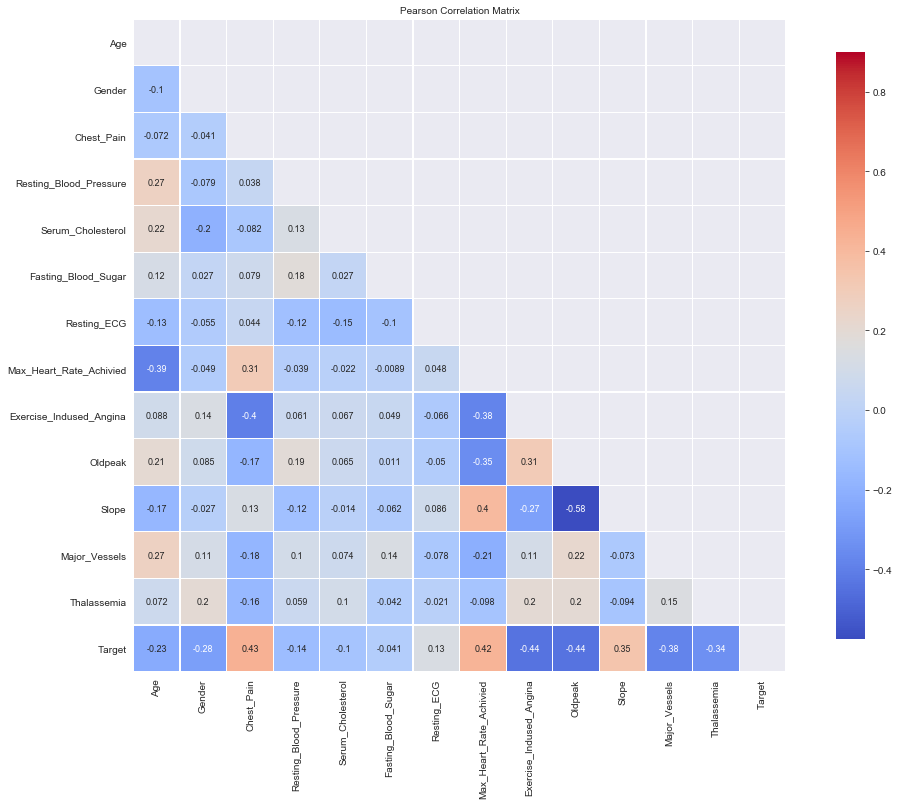

In [228]:
mask = np.zeros_like(df.corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(18, 12))
plt.title('Pearson Correlation Matrix',fontsize=10)

sns.heatmap(df.corr(),linewidths=0.25,vmax=0.9,square=True,cmap="coolwarm",
            linecolor='w',annot=True,annot_kws={"size":9},mask=mask,cbar_kws={"shrink": .9});
plt.show()

## Start with Target Variable - Heart Disease
## 0 = No Disease, 1 = Disease

In [229]:
df['Heart_Disease'] = np.where(df['Target'] == 0,'Healthy Heart','Heart Disease')

In [230]:
#Default Count
print('Target Variable')
print(df.groupby(['Heart_Disease']).Heart_Disease.count())

Target Variable
Heart_Disease
Healthy Heart    499
Heart Disease    526
Name: Heart_Disease, dtype: int64


In [231]:
#Percentages 
print("Percent without Disease")
print((df.groupby(['Heart_Disease']).Heart_Disease.count()[0]/df.groupby(['Heart_Disease']).Heart_Disease.count().sum()))
print("Percent with Disease")
print((df.groupby(['Heart_Disease']).Heart_Disease.count()[1]/df.groupby(['Heart_Disease']).Heart_Disease.count().sum()))

# Seems to be somewhat Balanced dataset

Percent without Disease
0.4868292682926829
Percent with Disease
0.5131707317073171


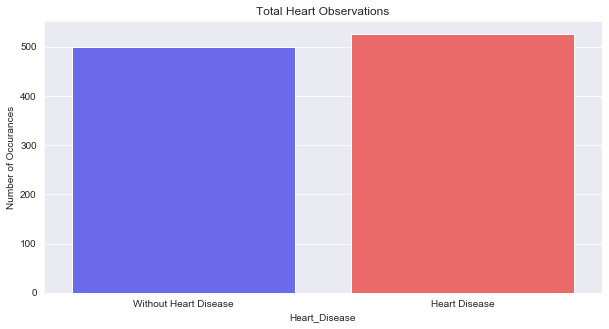

In [232]:
#Target Variable Countplot
plt.figure(figsize = (10,5))
sns.countplot(df['Heart_Disease'], palette="seismic")
plt.title('Total Heart Observations')
plt.ylabel('Number of Occurances')
plt.xticks(np.arange(2), ['Without Heart Disease','Heart Disease'])
plt.show()

## Independant Variable 1 : Age

In [233]:
df.Age.describe()

count    1025.000000
mean       54.434146
std         9.072290
min        29.000000
25%        48.000000
50%        56.000000
75%        61.000000
max        77.000000
Name: Age, dtype: float64

In [234]:
#for colname in categorical:
#df['Gender'] = df['Gender'].astype(object)

In [235]:
df.Gender.describe()

count    1025.000000
mean        0.695610
std         0.460373
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Gender, dtype: float64

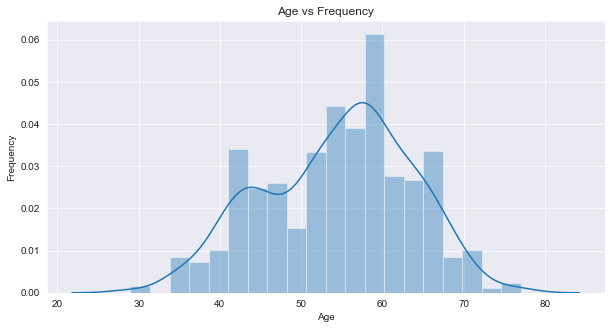

In [236]:
fig, ax = plt.subplots(figsize = (10,5));
sns.distplot(df.Age,kde=True, bins=20);
ax.set(xlabel='Age', ylabel='Frequency', title='Age vs Frequency');

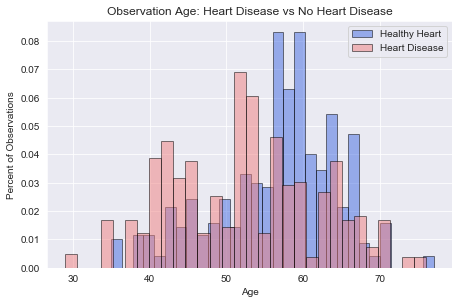

In [237]:
sns.set_style('darkgrid')
fig = plt.figure(figsize = (16,10))

ax1 = fig.add_subplot(221)
ax1.hist(df[df['Heart_Disease'] == 'Healthy Heart'].Age, label = 'Healthy Heart', 
         density = True, bins = 30, alpha = .50,edgecolor= 'black',color ='royalblue')

ax1.hist(df[df['Heart_Disease'] == 'Heart Disease'].Age, label = 'Heart Disease', 
         density = True, bins = 30, alpha = .50, edgecolor = 'black',color = 'lightcoral')

ax1.set_title('Observation Age: Heart Disease vs No Heart Disease')
ax1.set_xlabel('Age')
ax1.set_ylabel('Percent of Observations')
ax1.legend(loc = 'upper right')


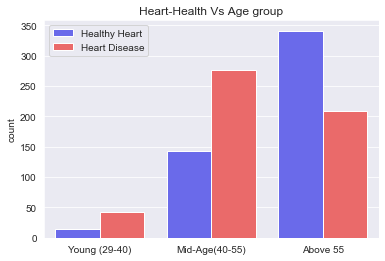

In [238]:

age_groups=[]
for i in df['Age']:
    if (i >= 29) & (i < 40):
        age_groups.append(0)
    elif (i >= 40)&(i < 55):
        age_groups.append(1)
    else:
        age_groups.append(2)
df['Age-Group'] = age_groups

plt.title("Heart-Health Vs Age group")
ax = sns.countplot(x=age_groups,hue=heart_health,palette="seismic")
ax.set_xticklabels(['Young (29-40)','Mid-Age(40-55)','Above 55']);

Age notes:

--Seem to be observing a lot of people in the 50-65 range


--Interesting spike of Heart Disease case with 40-55 year olds

## Independant Variable 2: Gender

0 = Female
1 = Male

In [252]:
df.groupby(['Gender','Heart_Disease']).describe()
# A lot more Males observations
# Observed females have higher chance of Heart Disease

Age                                                  \
                      count       mean        std   min    25%   50%    75%   
Gender Heart_Disease                                                          
0      Healthy Heart   86.0  59.058140   5.020791  43.0  56.25  61.0  62.00   
       Heart Disease  226.0  54.628319  10.312620  34.0  46.00  54.0  63.75   
1      Healthy Heart  413.0  56.050847   8.296381  35.0  51.00  57.0  61.00   
       Heart Disease  300.0  50.736667   8.736996  29.0  44.00  51.5  57.00   

                           Chest_Pain            ... Target      Age-Group  \
                       max      count      mean  ...    75%  max     count   
Gender Heart_Disease                             ...                         
0      Healthy Heart  66.0       86.0  0.174419  ...    0.0  0.0      86.0   
       Heart Disease  76.0      226.0  1.323009  ...    1.0  1.0     226.0   
1      Healthy Heart  77.0      413.0  0.547215  ...    0.0  0.0     413.0   
       Heart Disease  70.0      300.0  1.420000  ...    1.0  1.0     300.0   

                                                                   
                          mean       std  min  25%  50%  75%  max  
Gender Heart_Disease                                               
0      Healthy Heart  1.918605  0.275045  1.0  2.0  2.0  2.0  2.0  
       Heart Disease  1.407080  0.627335  0.0  1.0  1.0  2.0  2.0  
1      Healthy Heart  1.598063  0.560163  0.0  1.0  2.0  2.0  2.0  
       Heart Disease  1.246667  0.594700  0.0  1.0  1.0  2.0  2.0  

[4 rows x 112 columns]

[Text(0, 0, 'Female'), Text(0, 0, 'Male')]

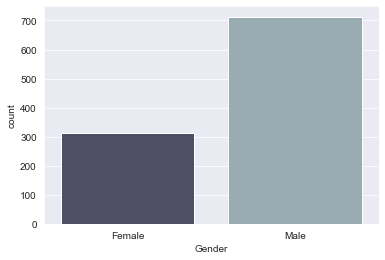

In [240]:
g = sns.countplot(x = 'Gender', data = df, palette = 'bone')
g.set_xticklabels(['Female','Male'])

[Text(0, 0, 'Female'), Text(0, 0, 'Male')]

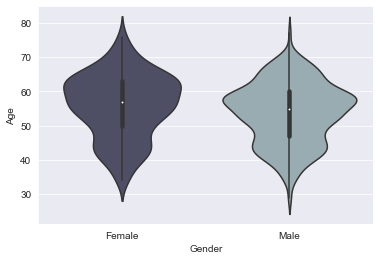

In [241]:
ag = sns.violinplot(x="Gender", y="Age", data=df.reset_index(), palette="bone")
ag.set_xticklabels(['Female','Male'])

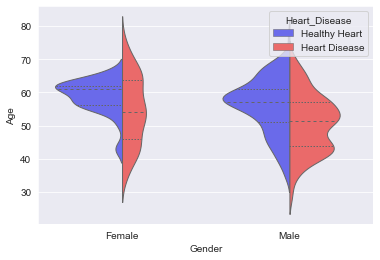

In [242]:
ag = sns.violinplot(data=df, x="Gender", y="Age", hue="Heart_Disease",
               split=True, inner="quart", linewidth=1,palette="seismic")
ag = ag.set_xticklabels(['Female','Male'])

# A lot of observations around 60 years old. Makes me think younger people only beign observed when showing symptoms

## Independant Variable 3: Chest Pain

In [243]:
##### Create Age Bins #####
bins = [-1,0,1,2,3]
labels = ['Typical Angina','Atypical Angina','Non-Anginal','Asymptomatic']
df['Chest_Pain_Type'] = pd.cut(df['Chest_Pain'], bins=bins, labels=labels)

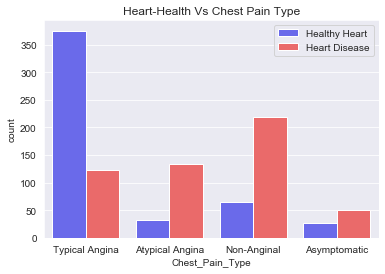

In [244]:
plt.title("Heart-Health Vs Chest Pain Type")
ax = sns.countplot(x='Chest_Pain_Type',hue=heart_health,data=df.reset_index(),palette='seismic')

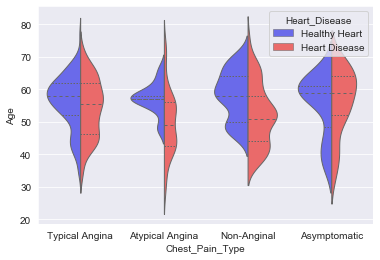

In [245]:
cp = sns.violinplot(data=df, x="Chest_Pain_Type", y="Age", hue="Heart_Disease",
               split=True, inner="quart", linewidth=1,palette="seismic")

## Independant Variable 4: Resting Blood Pressure

In [ ]:
#High blood pressure is a systolic pressure of 130 or higher and below 130 is considred normal
#1 = High Blood Pressure
#0 = Normal

df['Blood_Pressure_Level'] = np.where(df['Resting_Blood_Pressure'] > 130, 1,0)

In [248]:
df.groupby(['Heart_Disease',])['Resting_Blood_Pressure'].describe()

,count,mean,std,min,25%,50%,75%,max
Heart_Disease,,,,,,,,
Healthy Heart,499.0,134.106212,18.576736,100.0,120.0,130.0,144.0,200.0
Heart Disease,526.0,129.245247,16.112188,94.0,120.0,130.0,140.0,180.0


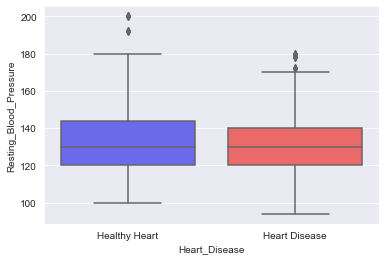

In [278]:
rsb = sns.boxplot(data=df, x="Heart_Disease", y="Resting_Blood_Pressure",palette="seismic")

In [286]:
df[df['Resting_Blood_Pressure']>180]

,Age,Gender,Chest_Pain,Resting_Blood_Pressure,Serum_Cholesterol,Fasting_Blood_Sugar,Resting_ECG,Max_Heart_Rate_Achivied,Exercise_Indused_Angina,Oldpeak,Slope,Major_Vessels,Thalassemia,Target,Heart_Disease,Age-Group,Chest_Pain_Type
151,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0,Healthy Heart,1,Atypical Angina
175,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0,Healthy Heart,2,Typical Angina
246,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0,Healthy Heart,1,Atypical Angina
294,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0,Healthy Heart,2,Typical Angina
326,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0,Healthy Heart,1,Atypical Angina
508,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0,Healthy Heart,2,Typical Angina
688,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0,Healthy Heart,2,Typical Angina


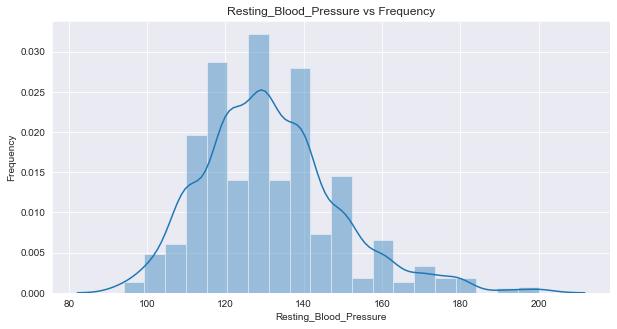

In [303]:
fig, ax = plt.subplots(figsize = (10,5));
sns.distplot(df['Resting_Blood_Pressure'],kde=True, bins=20);
ax.set(xlabel='Resting_Blood_Pressure', ylabel='Frequency', title='Resting_Blood_Pressure vs Frequency');

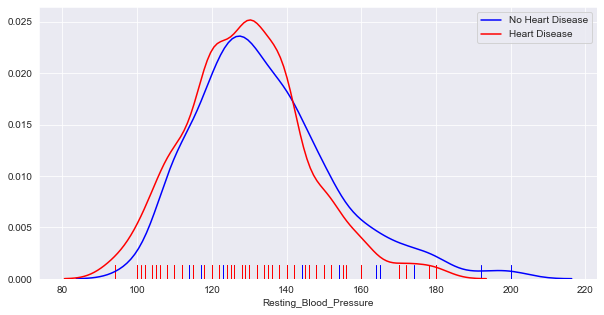

In [379]:
fig, ax = plt.subplots(figsize = (10,5));
sns.distplot(df[df['Target']==0].Resting_Blood_Pressure, color='blue',hist=False, rug=True, label = 'No Heart Disease')
sns.distplot(df[df['Target']==1].Resting_Blood_Pressure, color='red',hist=False, rug=True, label = 'Heart Disease')

In [ ]:
# Resting Blood Pressure doesnt seem to be very Telling of Heart Disease

## Independant Variable 5: Serum Cholesterol 

In [385]:
df.groupby(['Heart_Disease',])['Serum_Cholesterol_Level'].describe()

,count,mean,std,min,25%,50%,75%,max
Heart_Disease,,,,,,,,
Healthy Heart,499.0,0.853707,0.353754,0.0,1.0,1.0,1.0,1.0
Heart Disease,526.0,0.811787,0.391254,0.0,1.0,1.0,1.0,1.0


In [348]:
# Healthy serum cholesterol is less than 200 mg/dL
df['Serum_Cholesterol_Level'] = np.where(df['Serum_Cholesterol'] > 200, 1,0)

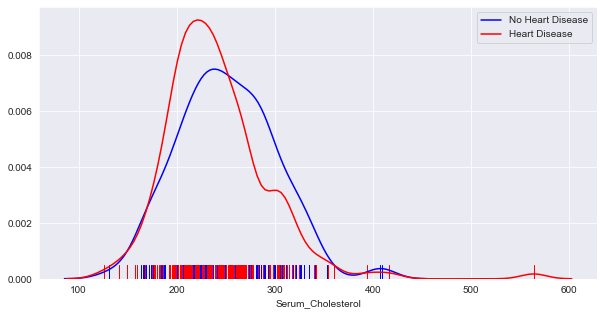

In [378]:
fig, ax = plt.subplots(figsize = (10,5));
sns.distplot(df[df['Target']==0].Serum_Cholesterol, color='blue',hist=False, rug=True, label = 'No Heart Disease')
sns.distplot(df[df['Target']==1].Serum_Cholesterol, color='red',hist=False, rug=True, label = 'Heart Disease')

Text(0.5, 1.0, 'Resting Blood Pressure vs Serum Cholesterol')

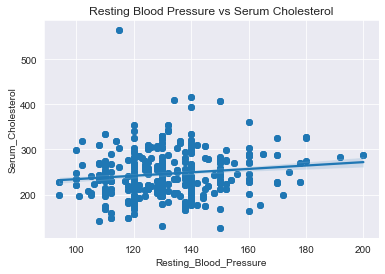

In [347]:
sns.regplot(x=df.Resting_Blood_Pressure,y=df.Serum_Cholesterol)
plt.title('Resting Blood Pressure vs Serum Cholesterol')

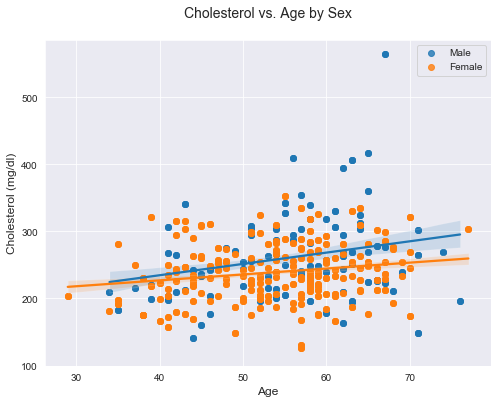

In [377]:
plt.figure(figsize=(8,6))
sns.regplot('Age', 'Serum_Cholesterol', data=df[df.Gender == 0], label='Male')
sns.regplot('Age', 'Serum_Cholesterol', data=df[df.Gender == 1], label='Female')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Cholesterol (mg/dl)', fontsize=12)
plt.title('Cholesterol vs. Age by Sex\n', fontsize=14)
plt.legend();

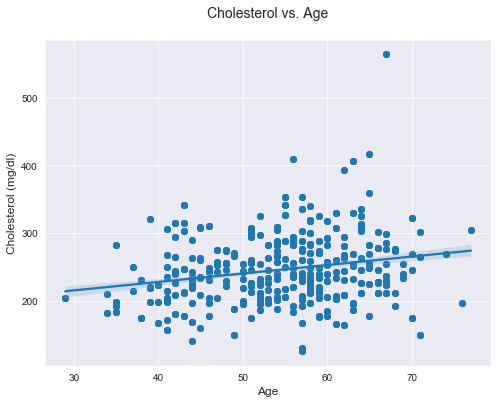

In [357]:
plt.figure(figsize=(8,6))
p = sns.regplot('Age', 'Serum_Cholesterol', data=df)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Cholesterol (mg/dl)', fontsize=12)
plt.title('Cholesterol vs. Age\n', fontsize=14);

In [ ]:
# We can say, based on this data, that both tend to have increase blood cholesterol levels with increases in age

### Splitting the data into train and test split

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X = df.drop(['Target', 'Chest_Pain_Type'],axis = 1)

In [33]:
y = df['Target']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

In [35]:
print(y_train.shape)
print(y_test.shape)

(820,)
(205,)


In [36]:
print(X_train.shape)
print(X_test.shape)

(820, 16)
(205, 16)


### Scaling the features

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
#scaler = StandardScaler()
#scaler.fit(x_train)
#x_train_s = pd.DataFrame(scaler.transform(x_train),columns=x_train.columns)
#x_test_s = pd.DataFrame(scaler.transform(x_test),columns=x_test.columns)
#x_train_s

In [39]:
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

/Users/AMINO/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/AMINO/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys
/Users/AMINO/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [41]:
#from statsmodels.stats.outliers_influence import variance_inflation_factor

#viffactor = [variance_inflation_factor(x_train_s.values, i) for i in range(x_train_s.shape[1])]

#vif = pd.DataFrame()
#vif["VIF Factor"] = viffactor
##[variance_inflation_factor(df_features.values, i) for i in range(df_features.shape[1])]
#vif["features"] = x_train_s.columns
#vif.round(1).sort_values("VIF Factor",ascending=False)
#vif

In [42]:
#from sklearn.linear_model import LogisticRegression
#logreg = LogisticRegression(C=1e9)
#logreg.fit(x_train, y_train)
#log_pred = logreg.predict(x_test_s)

### Using KNN Model

In [43]:
from sklearn.neighbors import KNeighborsClassifier

Minimum error:- 0.0 at K = 0


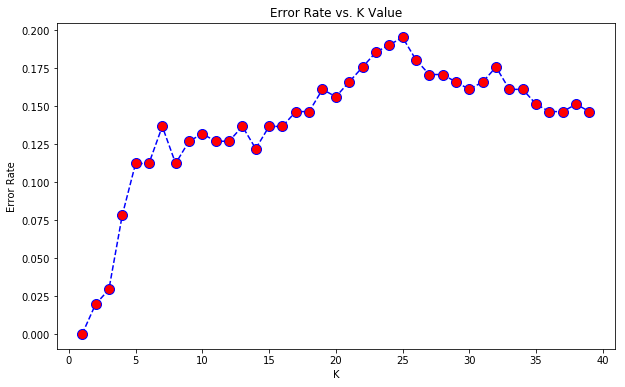

In [44]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

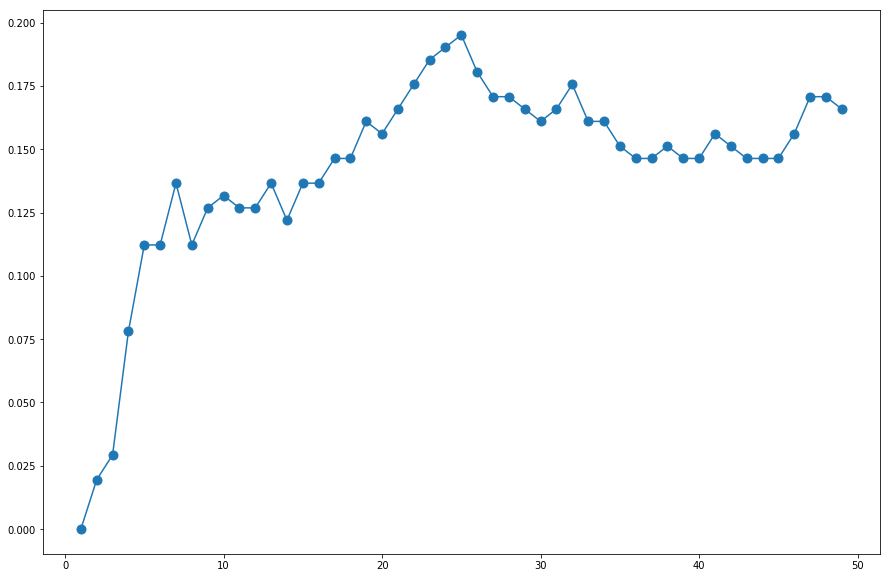

In [45]:
error_rate = []

for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred != y_test))

plt.figure(figsize=(15,10))
plt.plot(range(1,50),error_rate, marker='o', markersize=9)

Maximum accuracy:- 1.0 at K = 0


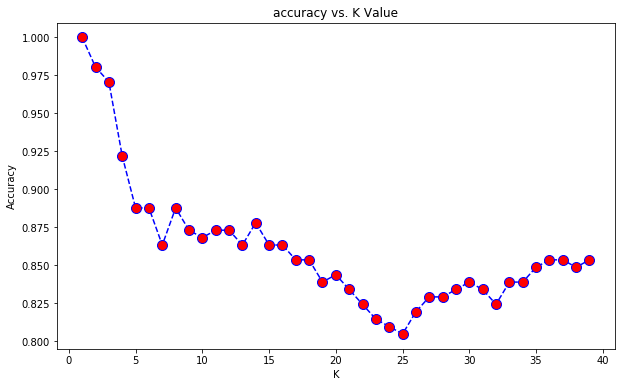

In [46]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [101]:
knn = KNeighborsClassifier(n_neighbors = 4)

In [102]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

In [103]:
knn_predicted = knn.predict(X_test)

In [104]:
knn_acc_score = accuracy_score(y_test, knn_predicted)

In [105]:
knn_predicted

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1])

In [106]:
knn_acc_score

0.9219512195121952

In [107]:
y_pred_class = knn.predict(X_test)

In [108]:
print('Accuracy:' + str(metrics.accuracy_score(y_test, y_pred_class)))

Accuracy:0.9219512195121952


In [122]:
knn_y_pred_class = knn.predict(X_test)

In [123]:
print(metrics.recall_score(y_test, knn_y_pred_class))

0.9626168224299065


In [118]:
model_1 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)

In [119]:
print("confussion matrix")
print(knn_conf_matrix)

confussion matrix
[[ 98   0]
 [  4 103]]


In [120]:
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')

Accuracy of K-NeighborsClassifier: 98.04878048780488 



In [121]:
print(classification_report(y_test,knn_predicted))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        98
           1       1.00      0.96      0.98       107

   micro avg       0.98      0.98      0.98       205
   macro avg       0.98      0.98      0.98       205
weighted avg       0.98      0.98      0.98       205



### Random Forest Classifier

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
rfc = RandomForestClassifier(n_estimators = 50, max_depth = 3)

In [62]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [63]:
rfc_predicted = rfc.predict(X_test)

In [64]:
rfc_acc_score = accuracy_score(y_test, rfc_predicted)

In [65]:
rfc_predicted

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1])

In [66]:
rfc_acc_score

0.9073170731707317

In [93]:
model_2 = 'Random Forest Classfier'
rfc = RandomForestClassifier(n_estimators=20, random_state=12,max_depth=5)
rfc.fit(X_train,y_train)
rfc_predicted = rfc.predict(X_test)
rfc_conf_matrix = confusion_matrix(y_test, rfc_predicted)
rfc_acc_score = accuracy_score(y_test, rfc_predicted)

In [94]:
print("confussion matrix")
print(rfc_conf_matrix)

confussion matrix
[[ 87  11]
 [  1 106]]


In [95]:
print("Accuracy of Random Forest:",rfc_acc_score*100,'\n')
print(classification_report(y_test,rfc_predicted))

Accuracy of Random Forest: 94.14634146341463 

              precision    recall  f1-score   support

           0       0.99      0.89      0.94        98
           1       0.91      0.99      0.95       107

   micro avg       0.94      0.94      0.94       205
   macro avg       0.95      0.94      0.94       205
weighted avg       0.95      0.94      0.94       205



### Logistic Regression

In [68]:
from sklearn.linear_model import LogisticRegression

In [69]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report

In [70]:
lr = LogisticRegression()

In [71]:
lr.fit(X_train,y_train)

/Users/AMINO/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [72]:
lr_predict = lr.predict(X_test)

In [73]:
lr_acc_score = accuracy_score(y_test, lr_predict)

In [74]:
lr_predict

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1])

In [75]:
lr_acc_score

0.8682926829268293

In [90]:
model_3 = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)

/Users/AMINO/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [91]:
print("confussion matrix")
print(lr_conf_matrix)

confussion matrix
[[ 77  21]
 [  6 101]]


In [92]:
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

Accuracy of Logistic Regression: 86.82926829268293 

              precision    recall  f1-score   support

           0       0.93      0.79      0.85        98
           1       0.83      0.94      0.88       107

   micro avg       0.87      0.87      0.87       205
   macro avg       0.88      0.86      0.87       205
weighted avg       0.88      0.87      0.87       205



In [77]:
lr_y_pred_class = lr.predict(X_test)

In [78]:
print(metrics.recall_score(y_test, lr_y_pred_class))

0.9439252336448598


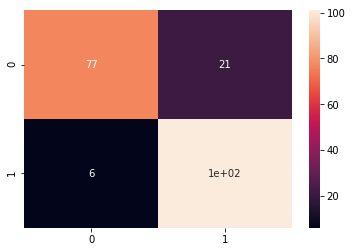

In [79]:
cm = confusion_matrix(y_test,lr_predict)
sns.heatmap(cm,annot=True);

###  Decision Tree Classifier

In [80]:
from sklearn.tree import DecisionTreeClassifier

In [86]:
model_4 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)

In [87]:
print("confussion matrix")
print(dt_conf_matrix)

confussion matrix
[[95  3]
 [ 8 99]]


In [83]:
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')

Accuracy of DecisionTreeClassifier: 94.6341463414634 



In [84]:
print(classification_report(y_test,dt_predicted))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95        98
           1       0.97      0.93      0.95       107

   micro avg       0.95      0.95      0.95       205
   macro avg       0.95      0.95      0.95       205
weighted avg       0.95      0.95      0.95       205

